In [23]:
import glob
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [32]:
from sklearn.cross_validation import train_test_split

In [16]:
#Combining CSV Files
#C:\Users\Pedro\Documents\nlpsideproject\data
fout=open("compiled.csv","a")
# first file:
for line in open("C:/Users/Pedro/Documents/nlpsideproject/data/yelp_data_second_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(1,24):
    f = open("C:/Users/Pedro/Documents/nlpsideproject/data/yelp_data_second_"+str(num)+".csv")
    f.next() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

In [27]:
url = 'C:/Users/Pedro/Documents/nlpsideproject/compiled.csv'

In [29]:
yelp = pd.read_csv(url)

In [30]:
yelp.head()

,rest_name,username,review,stars,date,location
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5.0,2017-08-25,"Washington, DC"
1,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4.0,2017-09-25,"Washington, DC"
2,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4.0,2017-08-11,"Washington, DC"
3,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5.0,2017-07-23,"Red Bank, NJ"
4,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4.0,2017-07-10,"Washington, DC"


In [39]:
#creating the dataframe
yelp_best_worst = []

In [40]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [43]:
# read yelp.csv into a DataFrame
url = 'C:/Users/Pedro/Documents/nlpsideproject/compiled.csv'
yelp = pd.read_csv(url)

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.review
y = yelp_best_worst.stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
yelp_best_worst.ix[0].review

"This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.\r\n\r\nThe food is yummy too, if you're okay with the dishes being a bit on the small side for the price.\r\n\r\nOverall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. \r\n\r\nA must-try if you live in the U Street/Shaw/Mt. Vernon area.\r\n"

In [45]:
# define X and y
X = yelp_best_worst.review
y = yelp_best_worst.stars

In [46]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
print len(X_train)
print len(X_test)

173
58


# Tokenization

In [49]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [50]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(173, 2259)

In [51]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'wining', u'winners', u'winter', u'wish', u'with', u'within', u'without', u'won', u'wondered', u'wonderful', u'wood', u'word', u'words', u'work', u'working', u'world', u'worried', u'worse', u'worst', u'worth', u'would', u'wouldn', u'wow', u'wrapped', u'wreck', u'wrestled', u'write', u'writing', u'written', u'wrong', u'yard', u'yasmani', u'yasmini', u'yaz', u'yeah', u'year', u'yelp', u'yelper', u'yesterday', u'yet', u'you', u'your', u'yourself', u'youthful', u'yum', u'yummy', u'zabaglione', u'zero', u'zoo', u'zucchini']


In [52]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [53]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(173, 2530)

In [54]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(173, 11552)

In [55]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'you this', u'you understand', u'you ve', u'you walk', u'you want', u'you won', u'your', u'your average', u'your credit', u'your customers', u'your employees', u'your experience', u'your friends', u'your grandmother', u'your heart', u'your in', u'your liking', u'your money', u'your mood', u'your mouth', u'your night', u'your palette', u'your preferences', u'your radar', u'your server', u'your staff', u'your thing', u'your time', u'your unsure', u'yourself', u'yourself favor', u'yourself longing', u'youthful', u'youthful energy', u'yum', u'yum for', u'yummy', u'yummy and', u'yummy grilled', u'yummy too', u'zabaglione', u'zabaglione divine', u'zero', u'zero complaints', u'zero hassle', u'zoo', u'zoo deal', u'zucchini', u'zucchini fritters', u'zucchini mix']


In [56]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes  to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.98275862069


In [57]:
# calculate null accuracy
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.96551724137931039

In [58]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

In [59]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  11552
Accuracy:  0.98275862069


# Part 3 - Stop Word Removals

In [60]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [61]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  2036
Accuracy:  1.0


In [62]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

In [63]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.965517241379


In [64]:
# all 100 features
print vect.get_feature_names()

[u'absolutely', u'amazing', u'ambiance', u'area', u'asked', u'atmosphere', u'bar', u'bartender', u'best', u'bottle', u'bread', u'came', u'charcuterie', u'cheese', u'cheeses', u'cocktails', u'come', u'crowded', u'date', u'dc', u'definitely', u'delicious', u'didn', u'different', u'dinner', u'don', u'drink', u'drinks', u'enjoyed', u'excellent', u'experience', u'fantastic', u'flight', u'food', u'french', u'friend', u'friendly', u'friends', u'gem', u'glass', u'glasses', u'going', u'good', u'got', u'great', u'group', u'happy', u'hour', u'jambe', u'just', u'knowledgeable', u'la', u'like', u'list', u'little', u'll', u'love', u'loved', u'make', u'meat', u'menu', u'neighborhood', u'new', u'nice', u'night', u'order', u'ordered', u'people', u'place', u'plate', u'plates', u'price', u'prices', u'really', u'recommend', u'restaurant', u'review', u'right', u'saturday', u'selection', u'server', u'service', u'shaw', u'small', u'spot', u'staff', u'super', u'table', u'time', u'tried', u'try', u'unique', u'

In [65]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  11552
Accuracy:  0.98275862069


In [66]:
# include 1-grams and 2-grams, and only include terms that appear at least 2 times
vect = CountVectorizer(ngram_range=(1, 2), min_df=2)
tokenize_test(vect)

Features:  3871
Accuracy:  0.98275862069


Introduction to TextBlob

In [68]:
# print the first review
print yelp_best_worst.review[0]

This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.

The food is yummy too, if you're okay with the dishes being a bit on the small side for the price.

Overall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. 

A must-try if you live in the U Street/Shaw/Mt. Vernon area.



In [70]:
# save it as a TextBlob object
review = TextBlob(yelp_best_worst.review[0])

In [71]:
# list the words
review.words

WordList(['This', 'review', 'is', 'massively', 'overdue', 'I', 'do', "n't", 'write', 'a', 'lot', 'of', 'reviews', 'My', 'husband', 'and', 'I', 'are', 'semi-regulars', 'at', 'this', 'place', 'Anastasia', 'and', 'Dave', 'are', 'friendly', 'people', 'with', 'great', 'taste', 'and', 'they', 'have', 'created', 'wonderful', 'unpretentious', 'wine', 'bar', 'The', 'wine', 'list', 'is', 'delicious', 'we', 'have', 'our', 'favorites', 'like', 'everyone', 'but', 'have', 'never', 'had', 'a', 'bad', 'wine', 'from', 'their', 'list', 'and', 'the', 'staff', 'give', 'great', 'advice', 'if', 'you', "'re", 'not', 'sure', 'Anastasia', 'even', 'gave', 'us', 'recommendations', 'about', 'which', 'wineries', 'to', 'hit', 'up', 'in', 'her', 'native', 'land', 'on', 'our', 'summer', 'vacation', 'The', 'food', 'is', 'yummy', 'too', 'if', 'you', "'re", 'okay', 'with', 'the', 'dishes', 'being', 'a', 'bit', 'on', 'the', 'small', 'side', 'for', 'the', 'price', 'Overall', 'this', 'place', 'has', 'us', 'coming', 'back',

In [72]:
# list the sentences
review.sentences

[Sentence("This review is massively overdue (I don't write a lot of reviews)."),
 Sentence("My husband and I are semi-regulars at this place."),
 Sentence("Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar."),
 Sentence("The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure."),
 Sentence("Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation."),
 Sentence("The food is yummy too, if you're okay with the dishes being a bit on the small side for the price."),
 Sentence("Overall, this place has us coming back on the regular."),
 Sentence("The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well."),
 Sentence("A must-try if you live in the U Street/Shaw/Mt."),
 

In [73]:
# some string methods are available
review.lower()

TextBlob("this review is massively overdue (i don't write a lot of reviews). my husband and i are semi-regulars at this place. anastasia and dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. the wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.

the food is yummy too, if you're okay with the dishes being a bit on the small side for the price.

overall, this place has us coming back on the regular. the only downside is they've been so successful that it's rarer to see anastasia and dave hanging around these days, but that just means they've been doing well. 

a must-try if you live in the u street/shaw/mt. vernon area.
")

# Part 6: Stemming and Lemmatization

In [74]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in review.words]

[u'this', u'review', u'is', u'massiv', u'overdu', u'i', u'do', u"n't", u'write', u'a', u'lot', u'of', u'review', u'my', u'husband', u'and', u'i', u'are', u'semi-regular', u'at', u'this', u'place', u'anastasia', u'and', u'dave', u'are', u'friend', u'peopl', u'with', u'great', u'tast', u'and', u'they', u'have', u'creat', u'wonder', u'unpretenti', u'wine', u'bar', u'the', u'wine', u'list', u'is', u'delici', u'we', u'have', u'our', u'favorit', u'like', u'everyon', u'but', u'have', u'never', u'had', u'a', u'bad', u'wine', u'from', u'their', u'list', u'and', u'the', u'staff', u'give', u'great', u'advic', u'if', u'you', u're', u'not', u'sure', u'anastasia', u'even', u'gave', u'us', u'recommend', u'about', u'which', u'wineri', u'to', u'hit', u'up', u'in', u'her', u'nativ', u'land', u'on', u'our', u'summer', u'vacat', u'the', u'food', u'is', u'yummi', u'too', u'if', u'you', u're', u'okay', u'with', u'the', u'dish', u'be', u'a', u'bit', u'on', u'the', u'small', u'side', u'for', u'the', u'price',

In [75]:
# assume every word is a noun
print [word.lemmatize() for word in review.words]

['This', 'review', 'is', 'massively', 'overdue', 'I', 'do', "n't", 'write', 'a', 'lot', 'of', u'review', 'My', 'husband', 'and', 'I', 'are', 'semi-regulars', 'at', 'this', 'place', 'Anastasia', 'and', 'Dave', 'are', 'friendly', 'people', 'with', 'great', 'taste', 'and', 'they', 'have', 'created', 'wonderful', 'unpretentious', 'wine', 'bar', 'The', 'wine', 'list', 'is', 'delicious', 'we', 'have', 'our', u'favorite', 'like', 'everyone', 'but', 'have', 'never', 'had', 'a', 'bad', 'wine', 'from', 'their', 'list', 'and', 'the', 'staff', 'give', 'great', 'advice', 'if', 'you', "'re", 'not', 'sure', 'Anastasia', 'even', 'gave', u'u', u'recommendation', 'about', 'which', u'winery', 'to', 'hit', 'up', 'in', 'her', 'native', 'land', 'on', 'our', 'summer', 'vacation', 'The', 'food', 'is', 'yummy', 'too', 'if', 'you', "'re", 'okay', 'with', 'the', u'dish', 'being', 'a', 'bit', 'on', 'the', 'small', 'side', 'for', 'the', 'price', 'Overall', 'this', 'place', u'ha', u'u', 'coming', 'back', 'on', 'the

In [76]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in review.words]

['This', 'review', u'be', 'massively', 'overdue', 'I', 'do', "n't", 'write', 'a', 'lot', 'of', u'review', 'My', 'husband', 'and', 'I', u'be', 'semi-regulars', 'at', 'this', 'place', 'Anastasia', 'and', 'Dave', u'be', 'friendly', 'people', 'with', 'great', 'taste', 'and', 'they', 'have', u'create', 'wonderful', 'unpretentious', 'wine', 'bar', 'The', 'wine', 'list', u'be', 'delicious', 'we', 'have', 'our', 'favorites', 'like', 'everyone', 'but', 'have', 'never', u'have', 'a', 'bad', 'wine', 'from', 'their', 'list', 'and', 'the', 'staff', 'give', 'great', 'advice', 'if', 'you', "'re", 'not', 'sure', 'Anastasia', 'even', u'give', 'us', 'recommendations', 'about', 'which', 'wineries', 'to', 'hit', 'up', 'in', 'her', 'native', 'land', 'on', 'our', 'summer', 'vacation', 'The', 'food', u'be', 'yummy', 'too', 'if', 'you', "'re", 'okay', 'with', 'the', u'dish', u'be', 'a', u'bite', 'on', 'the', 'small', 'side', 'for', 'the', 'price', 'Overall', 'this', 'place', u'have', 'us', u'come', 'back', 'o

In [77]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [78]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features:  2159
Accuracy:  0.98275862069


In [79]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'winner', u'winter', u'wish', u'with', u'within', u'without', u'wo', u'wondered', u'wonderful', u'wood', u'word', u'work', u'working', u'world', u'worried', u'worse', u'worst', u'worth', u'would', u'wow', u'wrapped', u'wreck', u'wrestled', u'write', u'writing', u'written', u'wrong', u'x', u'yard-y', u'yasmani', u'yasmini', u'yaz', u'yaz/yasmani', u'yeah', u'year', u'year-round', u'yelp', u'yelper', u'yesterday', u'yet', u'you', u'your', u'yourself', u'youthful', u'yum', u'yummy', u'zabaglione', u'zero', u'zoo', u'zucchini']


# Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)¶

In [82]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.review)
features = vect.get_feature_names()
dtm.shape

(458, 3720)

In [83]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = unicode(yelp.review[review_id], 'utf-8')
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [84]:
summarize()

TOP SCORING WORDS:
meal
enjoyed
spring
chocolates
spent

RANDOM WORDS:
wine
date
plate
welcoming
light

Spent a delightful evening here on a gorgeous spring day. We enjoyed the outdoor seating, delicious food, and very nice wine. The bruschetta flight was so tasty we had to order a second. The charcuterie plate was also very good. We shared two flights of chocolates for dessert and enjoyed every one of them. If you are looking for good wine and a light meal with welcoming and attentive service, this is your place. A great choice for a cozy meal with friends or a dinner date!



# Sentiment Analysis

In [86]:
print review

This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.

The food is yummy too, if you're okay with the dishes being a bit on the small side for the price.

Overall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. 

A must-try if you live in the U Street/Shaw/Mt. Vernon area.



In [87]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.2600852272727273

In [88]:
# understanding the apply method
yelp['length'] = yelp.review.apply(len)
yelp.head(1)

,rest_name,username,review,stars,date,location,length
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5.0,2017-08-25,"Washington, DC",897


In [89]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [91]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['sentiment'] = yelp.review.apply(detect_sentiment)

In [92]:
yelp.columns

Index([u'rest_name', u'username', u'review', u'stars', u'date', u'location',
       u'length', u'sentiment'],
      dtype='object')

In [93]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

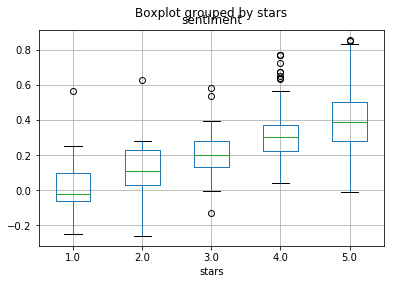

In [94]:
# box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [97]:
# reviews with most positive sentiment
yelp[yelp.sentiment == 1].review.head()

Series([], Name: review, dtype: object)

In [98]:
# reviews with most negative sentiment
yelp[yelp.sentiment == -1].review.head()

Series([], Name: review, dtype: object)